NOTE: For the most up to date version of this notebook, please be sure to copy from this link:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ByRi9d6_Yzu0nrEKArmLMLuMaZjYfygO#scrollTo=WgHANbxqWJPa)



## **Training YOLOv3 object detection on a custom dataset**

💡 Recommendation: [Open this blog post](https://blog.roboflow.ai/training-a-yolov3-object-detection-model-with-a-custom-dataset/) to continue.

### **Overview**

This notebook walks through how to train a YOLOv3 object detection model on your own dataset using Roboflow and Colab.

In this specific example, we'll training an object detection model to recognize chess pieces in images. **To adapt this example to your own dataset, you only need to change one line of code in this notebook.**

![Chess Example](https://i.imgur.com/nkjobw1.png)

### **Our Data**

Our dataset of 289 chess images (and 2894 annotations!) is hosted publicly on Roboflow [here](https://public.roboflow.ai/object-detection/chess-full).

### **Our Model**

We'll be training a YOLOv3 (You Only Look Once) model. This specific model is a one-shot learner, meaning each image only passes through the network once to make a prediction, which allows the architecture to be very performant, viewing up to 60 frames per second in predicting against video feeds.

The GitHub repo containing the majority of the code we'll use is available [here](https://github.com/roboflow-ai/keras-yolo3.git).

### **Training**

Google Colab provides free GPU resources. Click "Runtime" → "Change runtime type" → Hardware Accelerator dropdown to "GPU."

Colab does have memory limitations, and notebooks must be open in your browser to run. Sessions automatically clear themselves after 24 hours.

### **Inference**

We'll leverage the `python_video.py` script to produce predictions. Arguments are specified below.

It's recommended that you expand the left-hand panel to view this notebook's Table of contents, Code Snippets, and Files.

![Expand Colab](https://i.imgur.com/r8kWzIv.png "Click here")

Then, click "Files." You'll see files appear here as we work through the notebook.


### **About**

[Roboflow](https://roboflow.ai) makes managing, preprocessing, augmenting, and versioning datasets for computer vision seamless.

Developers reduce 50% of their boilerplate code when using Roboflow's workflow, save training time, and increase model reproducibility.

#### ![Roboflow Workmark](https://i.imgur.com/WHFqYSJ.png)







## Setup our environment

First, we'll install the version of Keras our YOLOv3 implementation calls for and verify it installs corrects.

In [ ]:
# Get our kernel running
print("Hello, Roboflow")

Hello, Roboflow


In [ ]:
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.2.12-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.5.2-0 ...
installing: conda-env-2.6.0-0 ...
installing: openssl-1.0.2j-0 ...
installing: pycosat-0.6.1-py35_1 ...
installing: readline-6.2-2 ...
installing: requests-2.11.1-py35_0 ...
installing: ruamel_yaml-0.11.14-py35_0 ...
installing: sqlite-3.13.0-0 ...
installing: tk-8.5.18-0 ...
installing: xz-5.2.2-0 ...
installing: yaml-0.1.6-0 ...
installing: zlib-1.2.8-3 ...
installing: conda-4.2.12-py35_0 ...
installing: pycrypto-2.6.1-py35_4 ...
installing: pip-8.1.2-py35_0 ...
installing: wheel-0.29.0-py35_0 ...
installing: setuptools-27.2.0-py35_0 ...
creating default environment...
using -f (force) option
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /usr/lo

--2024-04-01 11:44:25--  https://repo.continuum.io/miniconda/Miniconda3-4.2.12-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.177.84, 104.18.176.84, 2606:4700::6812:b054, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.177.84|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.2.12-Linux-x86_64.sh [following]
--2024-04-01 11:44:25--  https://repo.anaconda.com/miniconda/Miniconda3-4.2.12-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33905474 (32M) [application/x-sh]
Saving to: ‘Miniconda3-4.2.12-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0%  653K 51s
    50K .......... .......... .......... .......... .........

In [ ]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.5/site-packages"))

!python --version # Check python version

Python 3.5.2 :: Continuum Analytics, Inc.


In [ ]:
!curl -fsSL https://bootstrap.pypa.io/pip/3.5/get-pip.py | python3.5

     |████████████████████████████████| 1.5 MB 4.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 8.1.2
    Uninstalling pip-8.1.2:
      Successfully uninstalled pip-8.1.2


In [ ]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2 MB 81 kB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 162 kB 51.3 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 21.2 MB 1.2 MB/s 
     |████████████████████████████████| 19.9 MB 1.3 MB/s 
     |████████████████████████████████| 57 kB 5.7 MB/s 
     |████████████████████████████████| 488 kB 55.1 MB/s 
     |████████████████████████████████| 3.1 MB 46.3 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 132 kB 60.6 MB/s 
Ignoring futures: markers 'python_version < "3.2"' don't match your environment
Ignoring enum34: markers 'python_version < "3.4"' don't match your environment
     |████████████████████████████████| 2.8 MB 58.5 MB/s 
     |████████████████████████████████| 88 kB 8.7 MB/s 
     |████████████████████████████████| 785 kB 40.3 MB/s 
     |████████████████████████████████|

In [ ]:
# Install other dependencies
!pip install enum34
!pip install futures

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio 1.41.1 requires futures>=2.2.0, which is not installed.
  Created wheel for futures: filename=futures-3.0.5-py3-none-any.whl size=14076 sha256=2c8c1fa5040e5e03115a44f2bb108d721f567d076e0aa18ae17c2f1bd32c5ed9
  Stored in directory: /root/.cache/pip/wheels/ee/99/8a/34d59e68a1f6ec85a02e0ac91b574514a9be565fd8fcd6e84d
Successfully built futures


In [ ]:
# Our YOLOv3 implementation calls for this Keras version
!pip install keras==2.2.4

     |████████████████████████████████| 312 kB 4.0 MB/s 
     |████████████████████████████████| 269 kB 37.2 MB/s 
     |████████████████████████████████| 26.0 MB 1.7 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp35-cp35m-linux_x86_64.whl size=505958 sha256=412ad1b32f2a82f5dd12435bb068c9a01311646a16e62093d71164aa28a3c59d
  Stored in directory: /root/.cache/pip/wheels/57/d0/2c/e2003abb5bc1a94c2e8a6fe1c03b8055d074e34c13672e7eb7
Successfully built pyyaml


In [ ]:
# Verify our version is correct
!python -c 'import keras; print(keras.__version__)'

Using TensorFlow backend.
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
# Next, we'll grab all the code from our repository of interest
!git clone https://github.com/roboflow-ai/keras-yolo3

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 169, done.
remote: Total 169 (delta 0), reused 0 (delta 0), pack-reused 169
Receiving objects: 100% (169/169), 172.74 KiB | 1.14 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [ ]:
# here's what we cloned (also, see "Files" in the left-hand Colab pane)
%ls

keras-yolo3/  Miniconda3-4.2.12-Linux-x86_64.sh*  sample_data/


In [ ]:
# change directory to the repo we cloned
%cd keras-yolo3/

/content/keras-yolo3


In [ ]:
# show the contents of our repo
%ls

coco_annotation.py  font/      model_data/          train.py           yolo3/      yolov3-tiny.cfg
convert.py          kmeans.py  README.md            Tutorial.ipynb     yolo.py     yolo_video.py
darknet53.cfg       LICENSE    train_bottleneck.py  voc_annotation.py  yolov3.cfg


## Get our training data from Roboflow

Next, we need to add our data from Roboflow into our environment.

Our dataset, with annotations, is [here](https://public.roboflow.ai/object-detection/chess-full).

Here's how to bring those images from Roboflow to Colab:

1. Visit this [link](https://public.roboflow.ai/object-detection/chess-full).
2. Click the "416x416auto-orient" under Downloads.
3. On the dataset detail page, select "Download" in the upper right-hand corner.
4. If you are not signed in, you will be prompted to create a free account (sign in with GitHub or email), and redirected to the dataset page to Download.
5. On the download popup, select the YOLOv3 Keras option **and** the "Show download `code`".
6. Copy the code snippet Roboflow generates for you, and paste it in the next cell.

This is the download menu you want (from step 5):
#### ![Download Menu](https://i.imgur.com/KW2PyQO.png)

The top code snippet is the one you want to copy (from step 6) and paste in the next notebook cell:
### ![Code Snippet](https://i.imgur.com/qzJckWR.png)





**This cell below is only one you need to change to have YOLOv3 train on your own Roboflow dataset.**

In [ ]:
# Paste Roboflow code from snippet here from above to here! eg !curl -L https://app.roboflow.ai/ds/eOSXbt7KWu?key=YOURKEY | jar -x
!curl -L https://public.roboflow.com/ds/rNA0QGnC5I?key=Xx0IVwBLzi > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   907  100   907    0     0   1906      0 --:--:-- --:--:-- --:--:--  1909
100 16.2M  100 16.2M    0     0  4812k      0  0:00:03  0:00:03 --:--:-- 5985k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg  
 extracting: test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg  
 extracting: test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg  
 extracting: test/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54da23469189070a075.jpg  
 extracting: test/4e3117459d759798537eb52cf5bf534d_jpg.rf.ec961b62d4b0e131fae760ed1f80836b.jpg  
 extracting: test/5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.9dbdb057f6533c0c09c0eda

In [ ]:
%ls

coco_annotation.py  LICENSE              test/                valid/             yolov3-tiny.cfg
convert.py          model_data/          train/               voc_annotation.py  yolo_video.py
darknet53.cfg       README.dataset.txt   train_bottleneck.py  yolo3/
font/               README.md            train.py             yolo.py
kmeans.py           README.roboflow.txt  Tutorial.ipynb       yolov3.cfg


In [ ]:
# change directory into our export folder from Roboflow
%cd train

/content/keras-yolo3/train


In [ ]:
# show what came with the Roboflow export
%ls

00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.1a1407058a6170f001f2c269411d31d3.jpg
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.20e061b75dc554ebe40b33189e320831.jpg
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.38c0bb7971151bf4cb185f5498fddcc0.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.22f030d1bd7a26c987f287d2de4b19c7.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.254cb905329fee7e2df63d14b15368db.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.9d4f5de6e48861cf9108e46aee8dbb8f.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.087fbe5ea178dd757f4eb065ae5cf941.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.51d15aa9df1efc29ceca818ecbce37e1.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.d1c527f45625192911705f97416af54b.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.56da1174519560712119d3fc195068cb.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.7871491670bed0423e3beceb3fae8016.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.91a1164b0c74bbe8ab32435e44b990a4.jpg
03886821377011fec599e8fa12d86e89_jpg.rf.44fb00bcea92435e28c1ea1a89595b32.jpg

In [ ]:
# move everything from the Roboflow export to the root of our keras-yolo3 folder
%mv * ../

In [ ]:
# change directory back to our
%cd ..

/content/keras-yolo3


In [ ]:
# show that all our images, _annotations.txt, and _classes.txt made it to our root directory
%ls

00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.1a1407058a6170f001f2c269411d31d3.jpg
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.20e061b75dc554ebe40b33189e320831.jpg
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.38c0bb7971151bf4cb185f5498fddcc0.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.22f030d1bd7a26c987f287d2de4b19c7.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.254cb905329fee7e2df63d14b15368db.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.9d4f5de6e48861cf9108e46aee8dbb8f.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.087fbe5ea178dd757f4eb065ae5cf941.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.51d15aa9df1efc29ceca818ecbce37e1.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.d1c527f45625192911705f97416af54b.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.56da1174519560712119d3fc195068cb.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.7871491670bed0423e3beceb3fae8016.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.91a1164b0c74bbe8ab32435e44b990a4.jpg
03886821377011fec599e8fa12d86e89_jpg.rf.44fb00bcea92435e28c1ea1a89595b32.jpg

## Set up and train our model

Next, we'll download pre-trained weighs weights from DarkNet, set up our YOLOv3 architecture with those pre-trained weights, and initiate training.


In [ ]:
# download our DarkNet weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-04-01 12:00:12--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  6.56MB/s    in 25s     

2024-04-01 12:00:38 (9.47 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# call a Python script to set up our architecture with downloaded pre-trained weights
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Below, we'll call a "self-contained" Python script that initiates training our model on our custom dataset.

Pay notable attention to:
- setting the paths for our `annotation_path`, `classes_path`, `class_names`. If you move the Roboflow data location, you'll need to update these.
- `val_split` dictates the size of our training data relative to our taining data
- `lr=1e-3` to set the learning rate of the model. Smaller optimizes more slowly but potentially more precisely.
- `batch_size` for the number of images trained per batch
-  `epoch` inside `model.fit_generator()` sets the number training epochs to increase/decrease training examples (and time)

Consider reading the YOLOv3 paper [here](https://pjreddie.com/media/files/papers/YOLOv3.pdf).

In [ ]:
"""
Self-contained Python script to train YOLOv3 on your own dataset
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = '_annotations.txt'  # path to Roboflow data annotations
    log_dir = 'logs/000/'                 # where we're storing our logs
    classes_path = '_classes.txt'         # path to Roboflow class names
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    print("-------------------CLASS NAMES-------------------")
    print(class_names)
    print("-------------------CLASS NAMES-------------------")
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/yolo.h5') # make sure you know what you freeze

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.2 # set the size of the validation set
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 32
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=200,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 32 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=100,
            initial_epoch=50,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

if __name__ == '__main__':
    _main()

/usr/local/lib/python3.5/site-packages/Crypto/Random/Fortuna/FortunaGenerator.py:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sys.version_info[0] is 2 and  sys.version_info[1] is 1:
/usr/local/lib/python3.5/site-packages/Crypto/Random/Fortuna/FortunaGenerator.py:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sys.version_info[0] is 2 and  sys.version_info[1] is 1:


-------------------CLASS NAMES-------------------
['bishop', 'black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']
-------------------CLASS NAMES-------------------


Create YOLOv3 model with 9 anchors and 13 classes.


Load weights model_data/yolo.h5.
Freeze the first 249 layers of total 252 layers.


<ipython-input-23-22d7d12135db>:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),


Train on 485 samples, val on 121 samples, with batch size 32.
Epoch 1/200
15/15 [==============================] - 762s 51s/step - loss: 6473.0884 - val_loss: 4886.1118
Epoch 2/200
15/15 [==============================] - 741s 50s/step - loss: 4058.5413 - val_loss: 3401.3254
Epoch 3/200
15/15 [==============================] - 749s 51s/step - loss: 2859.0198 - val_loss: 2531.0488
Epoch 4/200
15/15 [==============================] - 737s 50s/step - loss: 2127.0806 - val_loss: 1862.2461
Epoch 5/200
15/15 [==============================] - 740s 50s/step - loss: 1679.3964 - val_loss: 1522.1012
Epoch 6/200
15/15 [==============================] - 739s 50s/step - loss: 1349.3398 - val_loss: 1281.3746
Epoch 7/200
15/15 [==============================] - 736s 50s/step - loss: 1170.2856 - val_loss: 1172.0890
Epoch 8/200
15/15 [==============================] - 740s 50s/step - loss: 982.1275 - val_loss: 990.2538
Epoch 9/200
15/15 [==============================] - 747s 51s/step - loss: 876.8640 

KeyboardInterrupt: 


### **In this activity, I tried to train YOLOv3 to recognize chess pieces in the images. Roboflow is used for the dataset. However, I've encountered a lot of compatibility issues with the provided code. Some functions have been deprecated or replaced in newer versions of libraries.  Upon trying to train the the model, there's an initial large number of loss for both training and validation, but still somehow improving as the number of epochs increases. Moreover, since I'm just using CPU, the training time took almost 13 minutes per epoch.**

## Training a Custom Dataset for Object Detection:

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 16522, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 16522 (delta 50), reused 52 (delta 16), pack-reused 16402
Receiving objects: 100% (16522/16522), 15.17 MiB | 25.80 MiB/s, done.
Resolving deltas: 100% (11307/11307), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.7/744.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB

In [ ]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="l9FcrMVPdl1a1ndBo3lv")
project = rf.workspace("jacob-solawetz").project("north-american-mushrooms")
version = project.version(3)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/North-American-Mushrooms-3 in yolov5pytorch:: 100%|██████████| 278/278 [00:00<00:00, 6440.83it/s]


In [ ]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

2024-04-01 15:27:51.114565: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 15:27:51.114794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 15:27:51.265038: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/datasets/North-American-Mushrooms-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device

### **As the number of epochs increases, the model improves since the loss continously decreasing. Overall, after training it for 149 epochs, the model achieved a high score in validation set for almost 100% in precision, 94% in recall, 99% in mean average precision with IoU threshold of 50%, and 75% maP with IoU threshold of 50%-95%. Higher IoU thresholds demand more precise placement of bounding boxes around objects, which can be challenging for the model.**

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/North-American-Mushrooms-3/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/datasets/North-American-Mushrooms-3/test/images/chanterelle_02_jpg.rf.23e0b07154b4c05895fa4a2f26bda105.jpg: 416x416 3 chanterelles, 7.1ms
image 2/5 /content/datasets/North-American-Mushrooms-3/test/images/chanterelle_03_jpg.rf.58a805342a65df328f9e9ed0c1a5bb19.jpg: 416x416 2

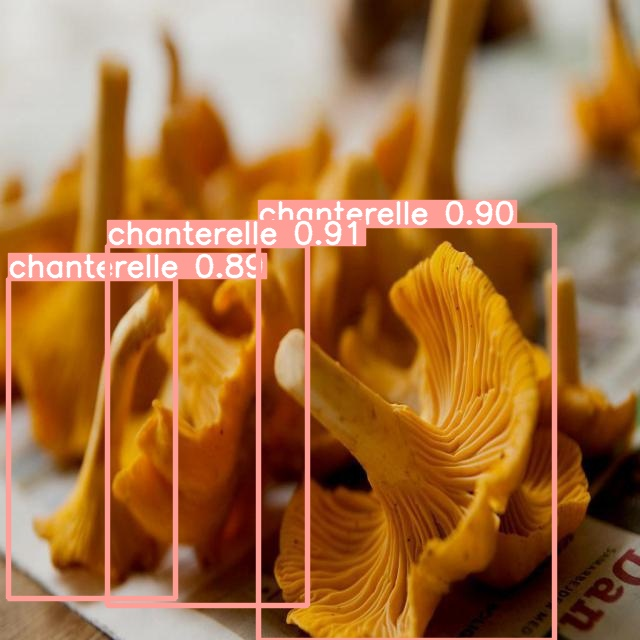

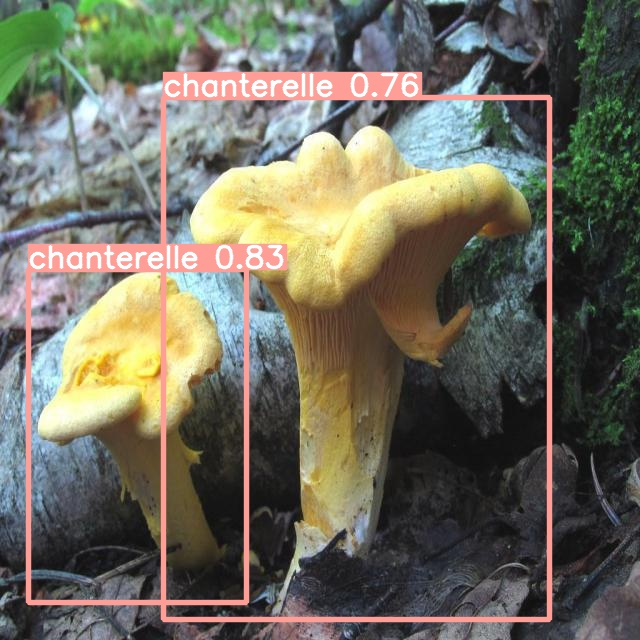

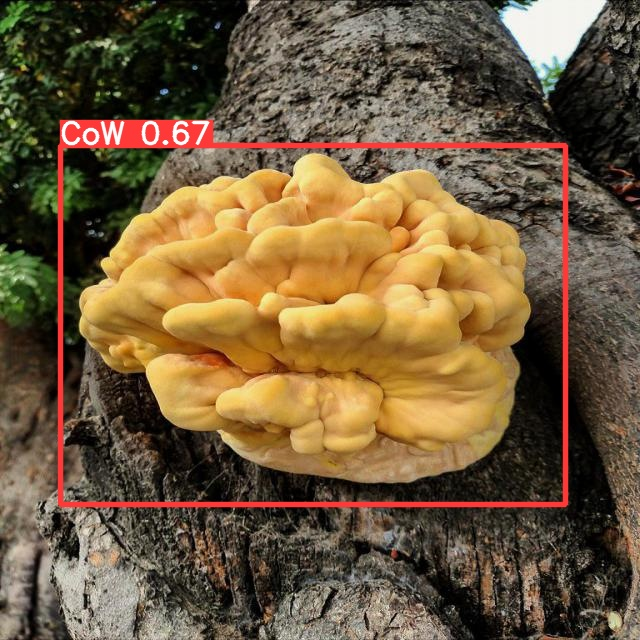

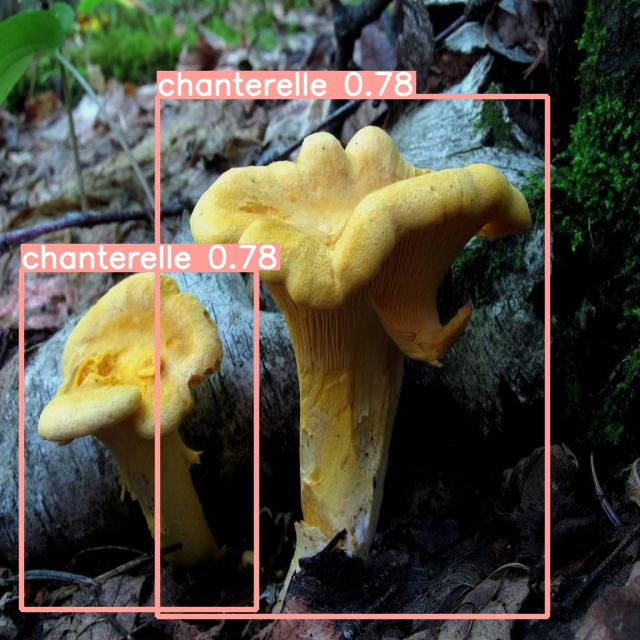

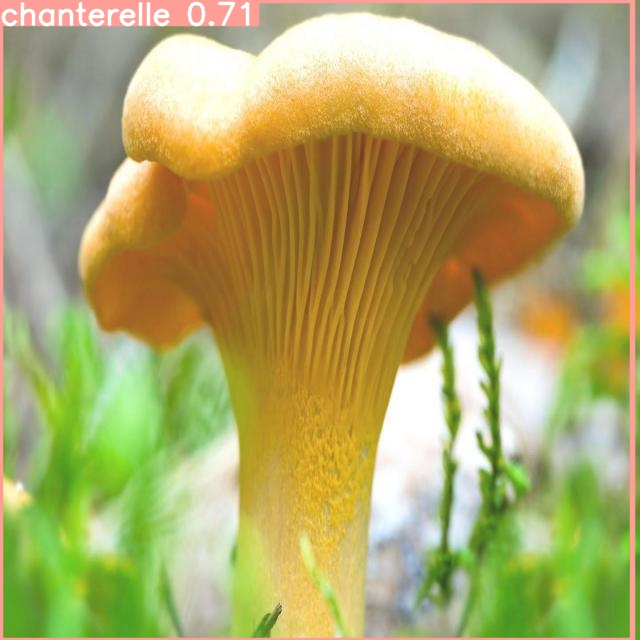

In [ ]:
# Displaying test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

### **The model accurately predicts the test images with a confidence level ranging from 67-91%**

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/P8040002-1024x768.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/P8040002-1024x768.jpg: 384x416 1 CoW, 51.9ms
Speed: 0.4ms pre-process, 51.9ms inference, 537.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp3


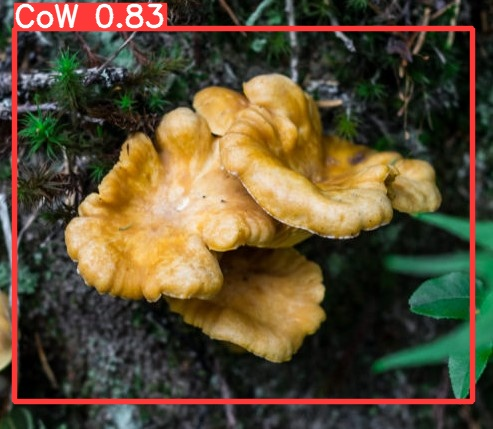

In [ ]:
# Image from the internet (not included in training the data)

!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/P8040002-1024x768.jpg
image_directory = '/content/yolov5/runs/detect/exp3/'
for imageName in glob.glob(image_directory + '*.jpg'):
    display(Image(filename=imageName))

### **The model correctly detected and predicted the unseen data with a good confidence level of 83%.**

## Conclusion:

## **In this activity, object detection using YOLO and Roboflow is implemented to identify and locate objects in the images. Moreover, different metrics are important for evaluating the performance of object detection models like precision, recall, mean average precision with IoU threshold of at least 50%, and maP ranging from 50-95%. Higher mAP values indicate better performance, where the model is more accurate and reliable in detecting the objects. In addition, when the IoU threshold is higher, it means the model requires more overlap between the predicted and actual bounding boxes to consider a detection correct.**